In [21]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import math
results_path = "/hpc/home/mk423/Anxiety/FullDataWork/Validations/"
results_file = results_path + "final_fixed_2_sup_net_30_net_kf_fold_{}_results.pkl"

plots_path = "/hpc/home/mk423/Anxiety/FullDataWork/Figures/"
plots_file = plots_path + "fixed_net_{}_30_component_kf_fold_{}_electome.png"

fold_list = [1,2,3,4]
def mean_sterr_auc_2n(auc_dict):
    temp = []
    temp_2 = []
    n_samps = 0
    for i, key in enumerate(auc_dict.keys()):
        if ~np.isnan(auc_dict[key][0]):            
            temp.append(auc_dict[key][0])
            temp_2.append(auc_dict[key][1])
    mean = np.mean(temp)
    stderr = np.std(temp) / np.sqrt(len(temp))
    
    mean_2 = np.mean(temp_2)
    stderr_2 = np.std(temp_2) / np.sqrt(len(temp_2))
    
    return mean, stderr, mean_2, stderr_2, len(temp)

In [22]:
flx_auc_list = []
epm_auc_list = []
oft_auc_list = []

flx_sterr_list = []
epm_sterr_list = []
oft_sterr_list = []

flx_points_list = []
epm_points_list = []
oft_points_list = []

flx_auc_list_2 = []
epm_auc_list_2 = []
oft_auc_list_2 = []

flx_sterr_list_2 = []
epm_sterr_list_2 = []
oft_sterr_list_2 = []

flx_points_list_2 = []
epm_points_list_2 = []
oft_points_list_2 = []

for fold in fold_list:
    
    resultsDict = pickle.load(open(results_file.format(fold),"rb"))
    print(fold)
    
    flx_mean, flx_sterr, flx_mean_2, flx_sterr_2, flx_n = mean_sterr_auc_2n(resultsDict['flx_val_auc'])
    print("\nFLX_1",flx_mean, flx_sterr, flx_n)
    print("FLX_2",flx_mean_2, flx_sterr_2, flx_n)
    print(resultsDict['flx_val_auc'].keys())
    print(resultsDict['flx_train_auc'].keys())

    flx_auc_list.append(flx_mean)
    flx_sterr_list.append(flx_sterr)
    flx_points_list.append([resultsDict['flx_val_auc'][key][0] for key in resultsDict['flx_val_auc'].keys()])
    flx_auc_list_2.append(flx_mean_2)
    flx_sterr_list_2.append(flx_sterr_2)
    flx_points_list_2.append([resultsDict['flx_val_auc'][key][1] for key in resultsDict['flx_val_auc'].keys()])

    
    epm_mean, epm_sterr, epm_mean_2, epm_sterr_2, epm_n = mean_sterr_auc_2n(resultsDict['epm_val_auc'])
    print("\nEPM_1",epm_mean, epm_sterr, epm_n)
    print("EPM_2",epm_mean_2, epm_sterr_2, epm_n)
    print(resultsDict['epm_val_auc'].keys())
    print(resultsDict['epm_train_auc'].keys())

    epm_auc_list.append(epm_mean)
    epm_sterr_list.append(epm_sterr)
    epm_points_list.append([resultsDict['epm_val_auc'][key][0] for key in resultsDict['epm_val_auc'].keys()])

    epm_auc_list_2.append(epm_mean_2)
    epm_sterr_list_2.append(epm_sterr_2)
    epm_points_list_2.append([resultsDict['epm_val_auc'][key][1] for key in resultsDict['epm_val_auc'].keys()])

    oft_mean, oft_sterr, oft_mean_2, oft_sterr_2, oft_n = mean_sterr_auc_2n(resultsDict['oft_val_auc'])
    print("\nOFT_1",oft_mean, oft_sterr, oft_n)
    print("OFT_2",oft_mean_2, oft_sterr_2, oft_n)
    print(resultsDict['oft_val_auc'].keys())
    print(resultsDict['oft_train_auc'].keys())

    oft_auc_list.append(oft_mean)
    oft_sterr_list.append(oft_sterr)
    oft_points_list.append([resultsDict['oft_val_auc'][key][0] for key in resultsDict['oft_val_auc'].keys()])

    oft_auc_list_2.append(oft_mean_2)
    oft_sterr_list_2.append(oft_sterr_2)
    oft_points_list_2.append([resultsDict['oft_val_auc'][key][1] for key in resultsDict['oft_val_auc'].keys()])



1

FLX_1 0.6765027691368107 0.03319145026951583 3
FLX_2 0.6992441759229492 0.034196637977419835 3
dict_keys(['Mouse3191', 'Mouse3192', 'Mouse3193'])
dict_keys(['Mouse3194', 'Mouse3202', 'Mouse3203', 'Mouse61631', 'Mouse61635', 'Mouse78744', 'Mouse78752', 'Mouse99002', 'Mouse99003', 'Mouse99021'])

EPM_1 0.5549063619563183 0.047221750043291454 7
EPM_2 0.5621270886739688 0.02692167108881191 7
dict_keys(['Mouse04193', 'Mouse04201', 'Mouse04202', 'Mouse04205', 'Mouse04215', 'Mouse0630', 'Mouse0633'])
dict_keys(['Mouse0634', 'Mouse0642', 'Mouse0643', 'Mouse1551', 'Mouse39114', 'Mouse39124', 'Mouse39125', 'Mouse39133', 'Mouse6291', 'Mouse6292', 'Mouse6293', 'Mouse69064', 'Mouse69065', 'Mouse69074', 'Mouse8580', 'Mouse8581', 'Mouse8582', 'Mouse8891', 'Mouse8894'])

OFT_1 0.5601146865956433 0.08807256575344359 3
OFT_2 0.5929365246285084 0.0891531501440969 3
dict_keys(['Mouse04193', 'Mouse04215', 'Mouse3191', 'Mouse3192', 'Mouse3193', 'Mouse3194', 'Mouse3203'])
dict_keys(['Mouse04191', 'Mouse04

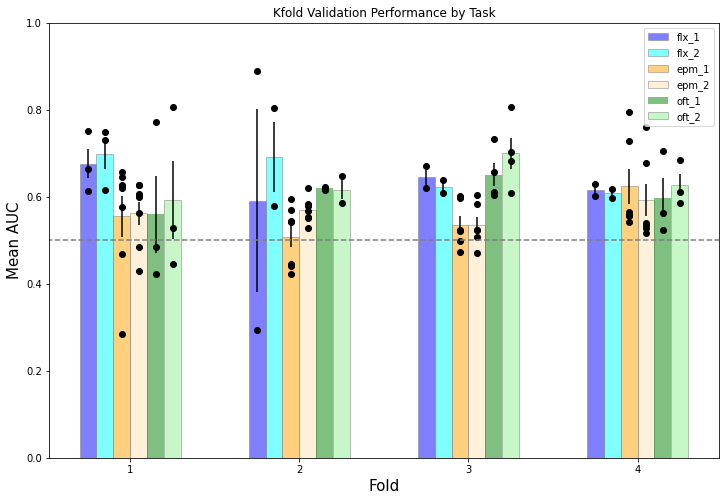

In [23]:
barWidth = 0.1
fig = plt.subplots(figsize=(12,8))

br1 = np.arange(len(flx_auc_list))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]

# Make the plot
plt.bar(br1, flx_auc_list,yerr=flx_sterr_list, width = barWidth,
        color="blue",edgecolor ='grey', label ='flx_1',alpha=0.5)
plt.bar(br2, flx_auc_list_2,yerr=flx_sterr_list_2, width = barWidth,
        color="cyan",edgecolor ='grey', label ='flx_2',alpha=0.5)
plt.bar(br3, epm_auc_list,yerr=epm_sterr_list, width = barWidth,
        color ='orange',edgecolor ='grey', label ='epm_1',alpha=0.5)
plt.bar(br4, epm_auc_list_2,yerr=epm_sterr_list_2, width = barWidth,
        color ='moccasin',edgecolor ='grey', label ='epm_2',alpha=0.5)
plt.bar(br5, oft_auc_list,yerr=oft_sterr_list, width = barWidth,
        color ='green', label ='oft_1',alpha=0.5)
plt.bar(br6, oft_auc_list_2,yerr=oft_sterr_list_2, width = barWidth,
        color ='lightgreen',edgecolor ='grey', label ='oft_2',alpha=0.5)

for fold in range(len(fold_list)):
    plt.scatter(np.ones(len(flx_points_list[fold]))*br1[fold],flx_points_list[fold],color="black")
    plt.scatter(np.ones(len(flx_points_list_2[fold]))*br2[fold],flx_points_list_2[fold],color="black")
    plt.scatter(np.ones(len(epm_points_list[fold]))*br3[fold],epm_points_list[fold],color="black")
    plt.scatter(np.ones(len(epm_points_list_2[fold]))*br4[fold],epm_points_list_2[fold],color="black")
    plt.scatter(np.ones(len(oft_points_list[fold]))*br5[fold],oft_points_list[fold],color="black")
    plt.scatter(np.ones(len(oft_points_list_2[fold]))*br6[fold],oft_points_list_2[fold],color="black")
    
plt.axhline(0.5,-1,6,linestyle="dashed",color="grey")
# Adding Xticks
plt.xlabel('Fold', fontsize = 15)
plt.ylabel('Mean AUC', fontsize = 15)
plt.xticks([r + 2.5*barWidth for r in range(len(flx_auc_list))],
        fold_list)

plt.legend()
plt.ylim([0,1])
plt.title("Kfold Validation Performance by Task")
plt.show()

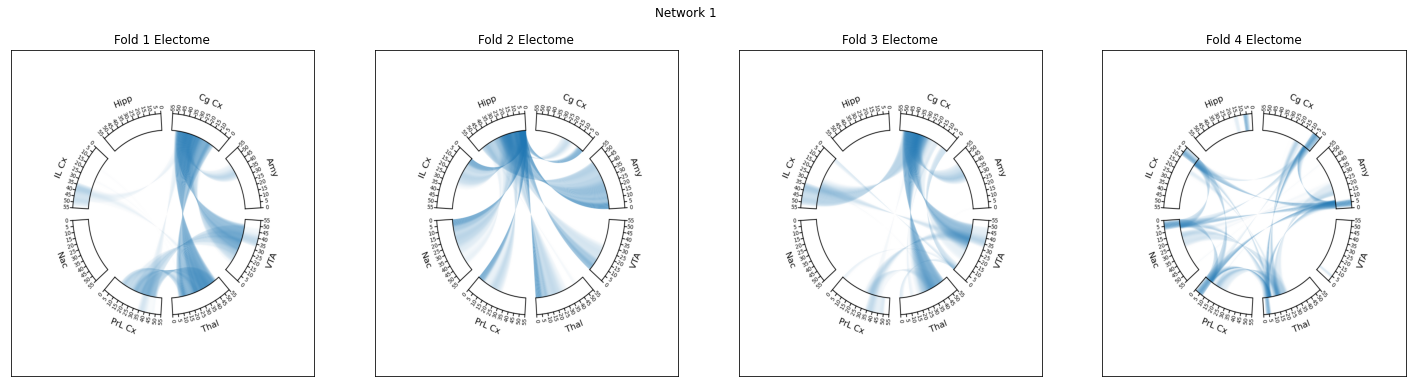

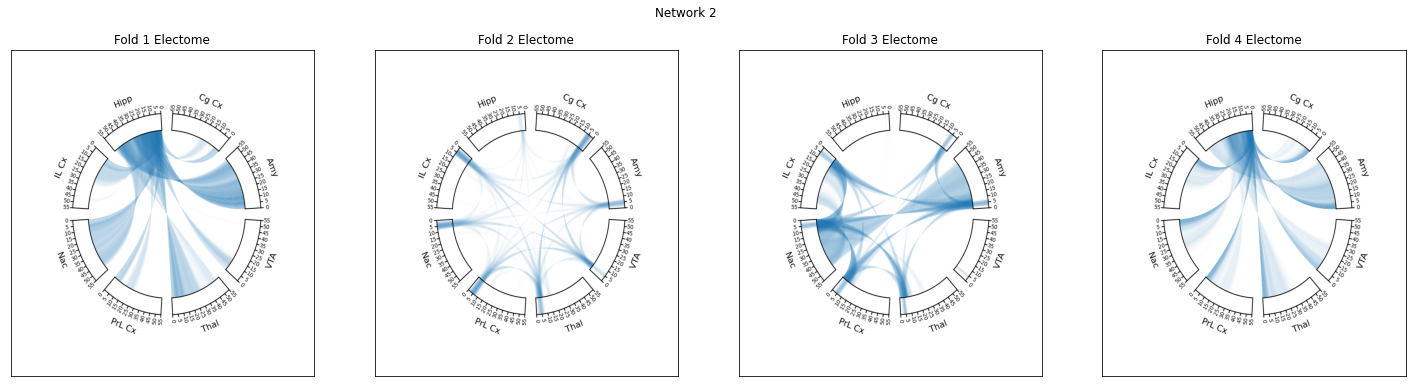

In [24]:
for net in [1,2]:
    plt.figure(figsize=(25,6))
    
    for i,fold in enumerate(fold_list):
        plt.subplot(1,4,i+1)
        im = image.imread(plots_file.format(net,fold))
        plt.imshow(im,aspect="auto")
        plt.title("Fold {} Electome".format(fold))
        plt.xticks([])
        plt.yticks([])
    plt.suptitle("Network {}".format(net))
    plt.show()